In [1]:
#!/usr/bin/env python3

import os
import sys
import numpy as np 
import argparse 
import time 

import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 


from torchvision import datasets, transforms

seed = 7
np.random.seed(seed)
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size =200

n_epochs = 5


def param(nnet, Mb=True):
    """
    Return the number of parameters in nnet
    """
    nelems = sum([param.nelement() for param in nnet.parameters()])

    return nelems / 10**6 if Mb else nelems

In [18]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
from torch.nn import functional as F

import numpy as np
import torch.optim as optim
import torch.utils.data
from torchvision import datasets, transforms
from collections import defaultdict


Num_H = 1600

class autoencoder(nn.Module):
    def __init__(self,Num_H):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, Num_H),
            nn.ReLU(True), nn.BatchNorm1d(Num_H))
        self.decoder = nn.Sequential(
            nn.Linear(Num_H, 28*28), nn.ReLU(True))
        self.name = "DNN_autoencoder"

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [19]:
def test_ae(model, criterion, optimizer, test_loader):
    # monitor training loss
    test_loss = 0.0
    for data in test_loader:
        # _ stands in for labels, here
        images, _ = data
        # flatten images
        images = images.view(images.size(0), -1)
        images = images.to(device)
        outputs = model(images)
        loss = criterion(outputs, images)
        test_loss += loss.item()*images.size(0)

    test_loss = test_loss/len(test_loader)
    print('Val. Loss: {:.6f}'.format( 
        test_loss
        ))
    return test_loss

def train_ae(model, n_epochs, criterion, optimizer, train_loader, test_loader, w_name = "19_ann_ae"):
    for epoch in range(1, n_epochs+1):
        # monitor training loss
        train_loss = 0.0
        test_loss = 0.0
        ###################
        # train the model #
        ###################
        for data in train_loader:
            # _ stands in for labels, here
            images, _ = data
            # flatten images
            images = images.view(images.size(0), -1)
            images = images.to(device)
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            outputs = model(images)
            # calculate the loss
            loss = criterion(outputs, images)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*images.size(0)

        # print avg training statistics 
        train_loss = train_loss/len(train_loader)
        test_loss = test_ae(model, criterion, optimizer, test_loader)
        print('Epoch: {} \t Training Loss: {:.6f} \t Val. Loss: {:.6f}'.format(
            epoch, 
            train_loss, test_loss
            ))

    torch.save(model.state_dict(), "model_weights/" + w_name + ".pt")
    return model, test_loss



In [20]:



### get data
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False,
                                  download=True, transform=transform)
# Create training and test dataloaders

seed = 7
np.random.seed(seed)
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


lr = 0.0001
# specify loss function

# number of epochs to train the model
n_epochs = 10



In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_res(model):
    # obtain one batch of test images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    images_flatten = images.view(images.size(0), -1)
    # get sample outputs
    output = model(images_flatten.to(device))
    # prep images for display
    images = images.numpy()

    # output is resized into a batch of images
    output = output.view(batch_size, 1, 28, 28)
    # use detach when it's an output that requires_grad
    output = output.cpu().detach().numpy()

    # plot the first ten input images and then reconstructed images
    fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

    # input images on top row, reconstructions on bottom
    for images, row in zip([images, output], axes):
        for img, ax in zip(images, row):
            ax.imshow(np.squeeze(img), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

In [77]:
# model_ae = autoencoder(800).cuda()
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(
# model_ae.parameters(), lr=1e-4, weight_decay=1e-5)

# model_ae = train_ae(model_ae, 10, criterion, optimizer, train_loader)
# loss = train_ae(model_ae, criterion, optimizer, test_loader)

# print("DNN MSE Results, N = 800")
# print("DNN MSE", param(model_ae),"MB", ", Val. loss = ", loss)
# show_res(model_ae)

# ANN AE Results

Val. Loss: 0.768552
Epoch: 1 	 Training Loss: 1.000794 	 Val. Loss: 0.768552
Val. Loss: 0.659580
Epoch: 2 	 Training Loss: 0.695453 	 Val. Loss: 0.659580
Val. Loss: 0.605080
Epoch: 3 	 Training Loss: 0.621150 	 Val. Loss: 0.605080
Val. Loss: 0.558038
Epoch: 4 	 Training Loss: 0.574871 	 Val. Loss: 0.558038
Val. Loss: 0.506654
Epoch: 5 	 Training Loss: 0.519452 	 Val. Loss: 0.506654
Val. Loss: 0.485110
Epoch: 6 	 Training Loss: 0.492316 	 Val. Loss: 0.485110
Val. Loss: 0.471638
Epoch: 7 	 Training Loss: 0.475523 	 Val. Loss: 0.471638
Val. Loss: 0.460892
Epoch: 8 	 Training Loss: 0.464472 	 Val. Loss: 0.460892
Val. Loss: 0.451241
Epoch: 9 	 Training Loss: 0.452878 	 Val. Loss: 0.451241
Val. Loss: 0.446232
Epoch: 10 	 Training Loss: 0.445881 	 Val. Loss: 0.446232
DNN MAE Results, N = 800
DNN MAE 1.255984 MB , Val. loss =  0.44623172949999573


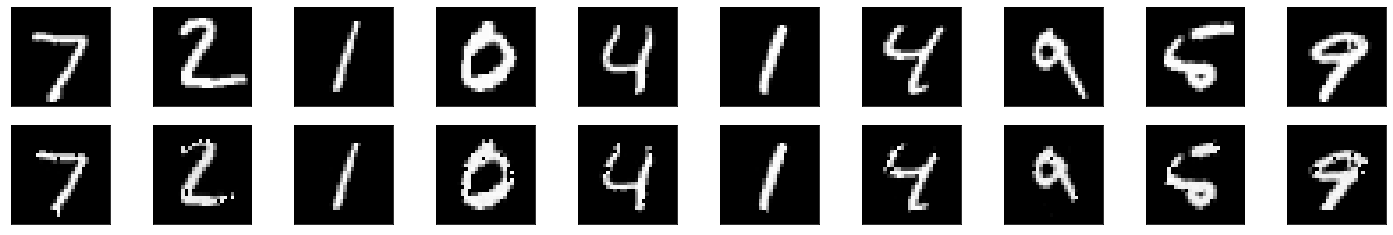

In [80]:
Num_H = 800

model_ae = autoencoder(Num_H).cuda()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(
model_ae.parameters(), lr=1e-4)

model_ae, loss = train_ae(model_ae, 10, criterion, optimizer, train_loader, test_loader, w_name = "ann_ae"+str(Num_H) )

print("DNN MAE Results, N = 800")
print("DNN MAE", param(model_ae),"MB", ", Val. loss = ", loss)
show_res(model_ae)

In [21]:
val_loss_book = []
para_book = []

Val. Loss: 3.053691
Epoch: 1 	 Training Loss: 4.069784 	 Val. Loss: 3.053691
Val. Loss: 2.525476
Epoch: 2 	 Training Loss: 2.749783 	 Val. Loss: 2.525476
Val. Loss: 2.302767
Epoch: 3 	 Training Loss: 2.389852 	 Val. Loss: 2.302767
Val. Loss: 2.209222
Epoch: 4 	 Training Loss: 2.244911 	 Val. Loss: 2.209222
Val. Loss: 2.148491
Epoch: 5 	 Training Loss: 2.174582 	 Val. Loss: 2.148491
Val. Loss: 2.087541
Epoch: 6 	 Training Loss: 2.113067 	 Val. Loss: 2.087541
Val. Loss: 2.035041
Epoch: 7 	 Training Loss: 2.053173 	 Val. Loss: 2.035041
Val. Loss: 1.998673
Epoch: 8 	 Training Loss: 2.007298 	 Val. Loss: 1.998673
Val. Loss: 1.975390
Epoch: 9 	 Training Loss: 1.978426 	 Val. Loss: 1.975390
Val. Loss: 1.958226
Epoch: 10 	 Training Loss: 1.957674 	 Val. Loss: 1.958226
DNN MAE Results, N = 10
--- DNN MAE 0.016494 MB , Val. loss =  1.9582263016700745


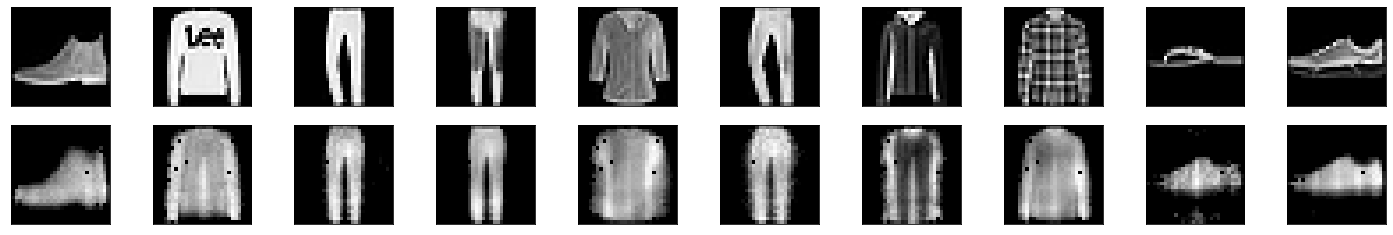

Val. Loss: 1.700284
Epoch: 1 	 Training Loss: 2.442292 	 Val. Loss: 1.700284
Val. Loss: 1.490767
Epoch: 2 	 Training Loss: 1.571765 	 Val. Loss: 1.490767
Val. Loss: 1.388173
Epoch: 3 	 Training Loss: 1.424301 	 Val. Loss: 1.388173
Val. Loss: 1.329274
Epoch: 4 	 Training Loss: 1.345600 	 Val. Loss: 1.329274
Val. Loss: 1.291877
Epoch: 5 	 Training Loss: 1.297783 	 Val. Loss: 1.291877
Val. Loss: 1.265288
Epoch: 6 	 Training Loss: 1.265479 	 Val. Loss: 1.265288
Val. Loss: 1.246688
Epoch: 7 	 Training Loss: 1.242715 	 Val. Loss: 1.246688
Val. Loss: 1.232868
Epoch: 8 	 Training Loss: 1.225627 	 Val. Loss: 1.232868
Val. Loss: 1.222401
Epoch: 9 	 Training Loss: 1.212886 	 Val. Loss: 1.222401
Val. Loss: 1.214203
Epoch: 10 	 Training Loss: 1.203188 	 Val. Loss: 1.214203
DNN MAE Results, N = 100
--- DNN MAE 0.157884 MB , Val. loss =  1.2142034654319287


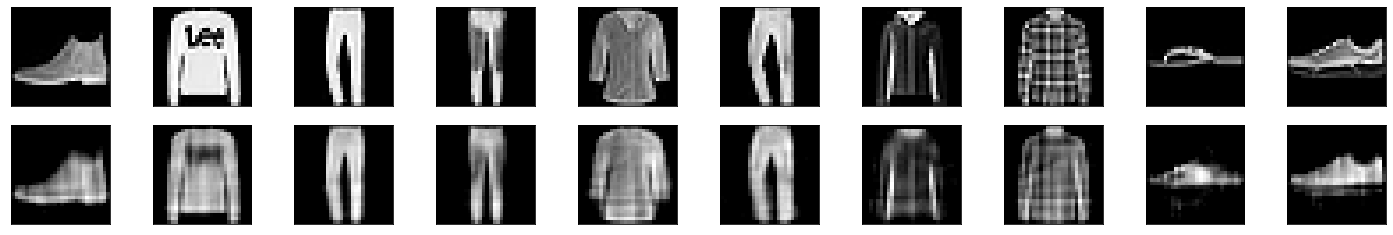

Val. Loss: 1.479348
Epoch: 1 	 Training Loss: 2.115908 	 Val. Loss: 1.479348
Val. Loss: 1.287324
Epoch: 2 	 Training Loss: 1.355640 	 Val. Loss: 1.287324
Val. Loss: 1.199957
Epoch: 3 	 Training Loss: 1.225638 	 Val. Loss: 1.199957
Val. Loss: 1.148352
Epoch: 4 	 Training Loss: 1.157524 	 Val. Loss: 1.148352
Val. Loss: 1.114364
Epoch: 5 	 Training Loss: 1.114568 	 Val. Loss: 1.114364
Val. Loss: 1.089953
Epoch: 6 	 Training Loss: 1.084638 	 Val. Loss: 1.089953
Val. Loss: 1.072379
Epoch: 7 	 Training Loss: 1.062722 	 Val. Loss: 1.072379
Val. Loss: 1.059594
Epoch: 8 	 Training Loss: 1.046107 	 Val. Loss: 1.059594
Val. Loss: 1.048052
Epoch: 9 	 Training Loss: 1.033053 	 Val. Loss: 1.048052
Val. Loss: 1.039890
Epoch: 10 	 Training Loss: 1.022704 	 Val. Loss: 1.039890
DNN MAE Results, N = 200
--- DNN MAE 0.314984 MB , Val. loss =  1.0398899072408676


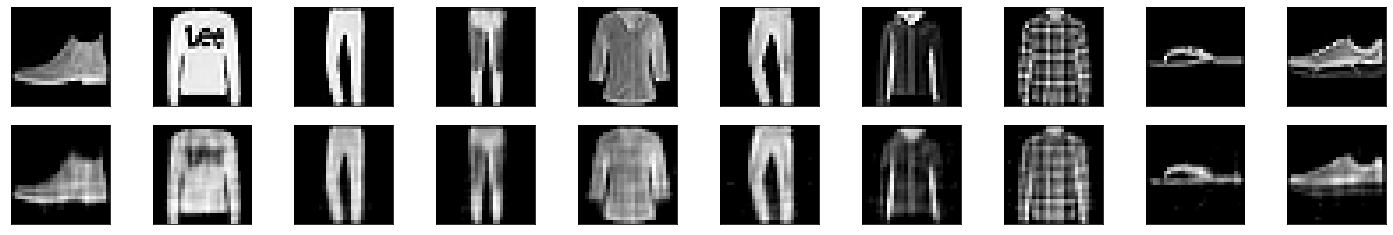

Val. Loss: 1.346799
Epoch: 1 	 Training Loss: 1.938914 	 Val. Loss: 1.346799
Val. Loss: 1.169419
Epoch: 2 	 Training Loss: 1.233692 	 Val. Loss: 1.169419
Val. Loss: 1.091480
Epoch: 3 	 Training Loss: 1.113595 	 Val. Loss: 1.091480
Val. Loss: 1.046459
Epoch: 4 	 Training Loss: 1.052303 	 Val. Loss: 1.046459
Val. Loss: 1.016670
Epoch: 5 	 Training Loss: 1.013872 	 Val. Loss: 1.016670
Val. Loss: 0.995485
Epoch: 6 	 Training Loss: 0.987298 	 Val. Loss: 0.995485
Val. Loss: 0.979593
Epoch: 7 	 Training Loss: 0.967694 	 Val. Loss: 0.979593
Val. Loss: 0.967454
Epoch: 8 	 Training Loss: 0.952586 	 Val. Loss: 0.967454
Val. Loss: 0.957411
Epoch: 9 	 Training Loss: 0.940374 	 Val. Loss: 0.957411
Val. Loss: 0.949263
Epoch: 10 	 Training Loss: 0.930434 	 Val. Loss: 0.949263
DNN MAE Results, N = 300
--- DNN MAE 0.472084 MB , Val. loss =  0.9492629139125347


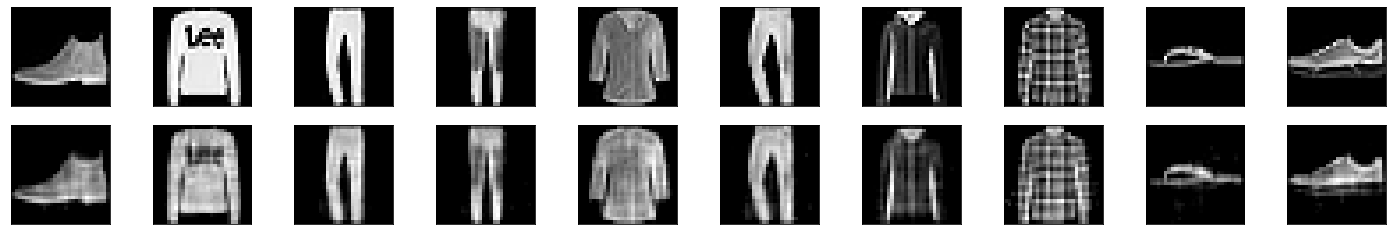

Val. Loss: 1.268277
Epoch: 1 	 Training Loss: 1.829913 	 Val. Loss: 1.268277
Val. Loss: 1.103539
Epoch: 2 	 Training Loss: 1.161885 	 Val. Loss: 1.103539
Val. Loss: 1.031838
Epoch: 3 	 Training Loss: 1.049102 	 Val. Loss: 1.031838
Val. Loss: 0.989852
Epoch: 4 	 Training Loss: 0.991246 	 Val. Loss: 0.989852
Val. Loss: 0.961185
Epoch: 5 	 Training Loss: 0.955280 	 Val. Loss: 0.961185
Val. Loss: 0.943486
Epoch: 6 	 Training Loss: 0.930830 	 Val. Loss: 0.943486
Val. Loss: 0.929290
Epoch: 7 	 Training Loss: 0.913167 	 Val. Loss: 0.929290
Val. Loss: 0.918944
Epoch: 8 	 Training Loss: 0.899533 	 Val. Loss: 0.918944
Val. Loss: 0.909698
Epoch: 9 	 Training Loss: 0.888715 	 Val. Loss: 0.909698
Val. Loss: 0.902821
Epoch: 10 	 Training Loss: 0.879700 	 Val. Loss: 0.902821
DNN MAE Results, N = 400
--- DNN MAE 0.629184 MB , Val. loss =  0.9028208444267511


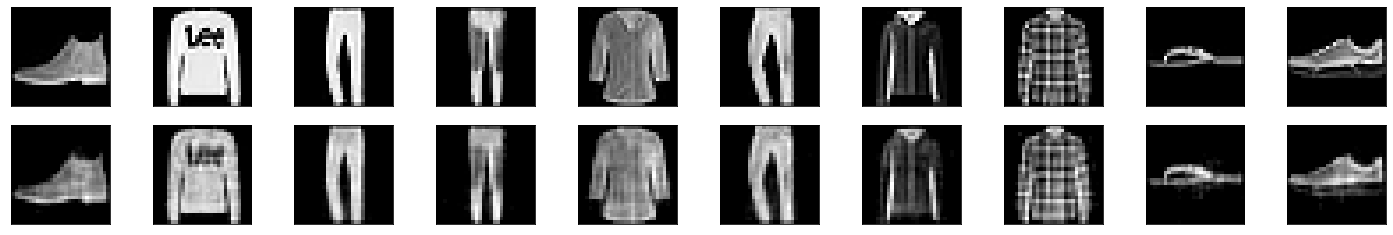

Val. Loss: 1.212756
Epoch: 1 	 Training Loss: 1.746683 	 Val. Loss: 1.212756
Val. Loss: 1.052609
Epoch: 2 	 Training Loss: 1.109359 	 Val. Loss: 1.052609
Val. Loss: 0.981511
Epoch: 3 	 Training Loss: 0.999267 	 Val. Loss: 0.981511
Val. Loss: 0.941636
Epoch: 4 	 Training Loss: 0.942610 	 Val. Loss: 0.941636
Val. Loss: 0.915586
Epoch: 5 	 Training Loss: 0.906936 	 Val. Loss: 0.915586
Val. Loss: 0.896036
Epoch: 6 	 Training Loss: 0.882535 	 Val. Loss: 0.896036
Val. Loss: 0.882533
Epoch: 7 	 Training Loss: 0.864375 	 Val. Loss: 0.882533
Val. Loss: 0.872157
Epoch: 8 	 Training Loss: 0.850685 	 Val. Loss: 0.872157
Val. Loss: 0.863027
Epoch: 9 	 Training Loss: 0.839353 	 Val. Loss: 0.863027
Val. Loss: 0.855881
Epoch: 10 	 Training Loss: 0.829809 	 Val. Loss: 0.855881
DNN MAE Results, N = 500
--- DNN MAE 0.786284 MB , Val. loss =  0.8558813998103142


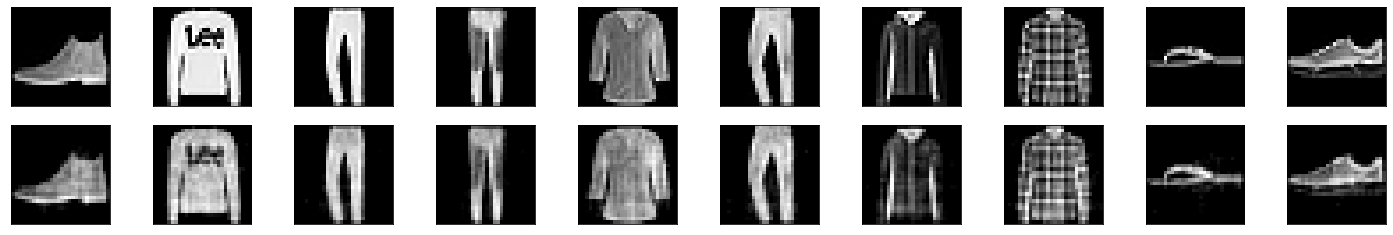

Val. Loss: 1.065606
Epoch: 1 	 Training Loss: 1.519844 	 Val. Loss: 1.065606
Val. Loss: 0.925529
Epoch: 2 	 Training Loss: 0.967317 	 Val. Loss: 0.925529
Val. Loss: 0.864734
Epoch: 3 	 Training Loss: 0.871297 	 Val. Loss: 0.864734
Val. Loss: 0.830381
Epoch: 4 	 Training Loss: 0.821858 	 Val. Loss: 0.830381
Val. Loss: 0.804885
Epoch: 5 	 Training Loss: 0.790328 	 Val. Loss: 0.804885
Val. Loss: 0.789196
Epoch: 6 	 Training Loss: 0.767998 	 Val. Loss: 0.789196
Val. Loss: 0.776959
Epoch: 7 	 Training Loss: 0.750920 	 Val. Loss: 0.776959
Val. Loss: 0.766137
Epoch: 8 	 Training Loss: 0.737885 	 Val. Loss: 0.766137
Val. Loss: 0.758520
Epoch: 9 	 Training Loss: 0.727174 	 Val. Loss: 0.758520
Val. Loss: 0.750997
Epoch: 10 	 Training Loss: 0.717544 	 Val. Loss: 0.750997
DNN MAE Results, N = 1000
--- DNN MAE 1.571784 MB , Val. loss =  0.7509972234815359


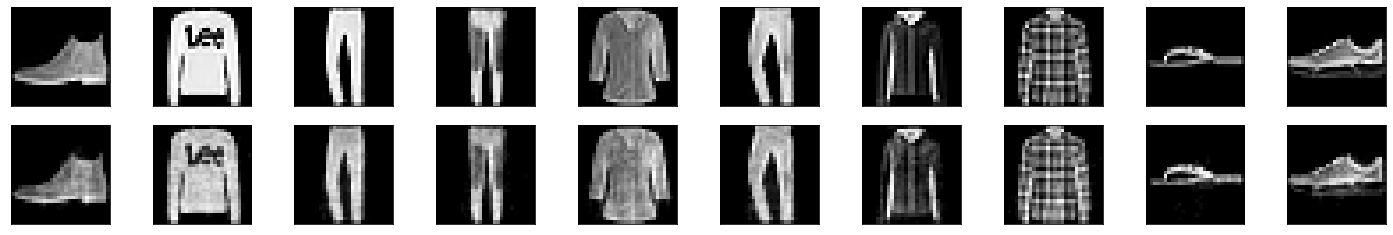

In [22]:
for Num_H in [10, 100, 200, 300, 400, 500, 1000]:

    model_ae = autoencoder(Num_H).cuda()
    criterion = nn.L1Loss()
    optimizer = torch.optim.Adam(
    model_ae.parameters(), lr=1e-4)

    model_ae , val_loss = train_ae(model_ae, 10, criterion, optimizer, train_loader, test_loader, w_name = "ann_ae"+str(Num_H) )
    val_loss_book.append(val_loss)

    print("DNN MAE Results, N =", Num_H)
    print("--- DNN MAE", param(model_ae),"MB", ", Val. loss = ", val_loss)
    para_book.append(param(model_ae))
    show_res(model_ae)

In [ ]:
for Num_H in [1600, 2400]:

    model_ae = autoencoder(Num_H).cuda()
    criterion = nn.L1Loss()
    optimizer = torch.optim.Adam(
    model_ae.parameters(), lr=1e-4)

    model_ae , val_loss = train_ae(model_ae, 10, criterion, optimizer, train_loader, test_loader, w_name = "ann_ae"+str(Num_H) )
    val_loss_book.append(val_loss)

    print("DNN MAE Results, N =", Num_H)
    print("--- DNN MAE", param(model_ae),"MB", ", Val. loss = ", val_loss)
    para_book.append(param(model_ae))
    show_res(model_ae)

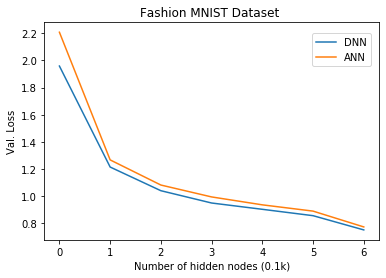

In [37]:
plt.ylabel('Val. Loss')
plt.xlabel('Number of hidden nodes (0.1k)')
plt.title('Fashion MNIST Dataset ')
plt.plot(val_loss_book,label="DNN")
plt.plot(b,label="ANN")
plt.legend(bbox_to_anchor=(0.80, 0.95), loc='upper left', borderaxespad=0.)


In [30]:
b = [2.20729487746954,
 1.2668773177266122,
 1.081640475988388,
 0.9940236170589923,
 0.9357244893908501,
 0.8894951892644167,
 0.7729716116189956]